In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11354 files belonging to 30 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [4]:
for x,y in training_set: # x-> pix.. value y-> label
    print (x , x.shape)
    print(y , y.shape)
    break

tf.Tensor(
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 2

In [5]:
# building model

from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.optimizers.legacy import Adam

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3])) # rectified linear unit
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu')) # 224x224x32
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

d:\MedicalPlant\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu', input_shape=[224,224 , 3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

In [11]:
# flattenig operation
model.add(Flatten())

In [12]:
model.add(Dense(units=1024,activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
# output layer
model.add(Dense(units=30 , activation='softmax'))

In [15]:
# compiling model 
model.compile(optimizer='Adam' , loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,079,230 (393.22 MB)

 Trainable params: 103,079,230 (393.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# model training
training_model=model.fit(x=training_set,validation_data=validation_set,epochs=15 , callbacks=callback)

Epoch 1/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.2887 - loss: 15.2121 - val_accuracy: 0.6268 - val_loss: 1.2214
Epoch 2/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - accuracy: 0.6775 - loss: 1.0717 - val_accuracy: 0.7815 - val_loss: 0.7792
Epoch 3/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.8719 - loss: 0.4131 - val_accuracy: 0.8254 - val_loss: 0.7267
Epoch 4/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.9235 - loss: 0.2339 - val_accuracy: 0.8288 - val_loss: 0.6860
Epoch 5/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 858s 2s/step - accuracy: 0.9465 - loss: 0.1791 - val_accuracy: 0.8072 - val_loss: 0.8612
Epoch 6/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.9539 - loss: 0.1493 - val_accuracy: 0.8288 - val_loss: 0.8434
Epoch 7/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 854s 2s/step - accuracy: 0.9692 - loss: 0.0982 - val_accuracy: 0.8361 - val_loss: 0.7612
Epoch 8/15
355/355 ━━━━━━━━━━━━━━━━━━━━ 856s 2s/step - accuracy: 0.9664 - loss: 0.1160 - val_acc

In [19]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 189s 533ms/step - accuracy: 0.9912 - loss: 0.0357


In [20]:
print(training_loss , train_accuracy)

0.02811930701136589 0.9918971061706543


In [21]:
# model evaluation on training set

validation_loss , validation_accuracy = model.evaluate(validation_set)

133/133 ━━━━━━━━━━━━━━━━━━━━ 70s 526ms/step - accuracy: 0.8192 - loss: 0.8741


In [22]:
print(validation_loss , validation_accuracy )

0.8658061623573303 0.8219016194343567


In [23]:
tf.keras.callbacks.History()

In [24]:
training_model.history

{'accuracy': [0.41447946429252625,
  0.7457283735275269,
  0.8889378309249878,
  0.9311255812644958,
  0.9488285779953003,
  0.9576360583305359,
  0.9690858125686646,
  0.9690858125686646,
  0.9732252955436707],
 'loss': [4.434659957885742,
  0.8314584493637085,
  0.3488132059574127,
  0.2164686620235443,
  0.1695728302001953,
  0.13882412016391754,
  0.09614162892103195,
  0.10487407445907593,
  0.09077558666467667],
 'val_accuracy': [0.6267738938331604,
  0.7814569473266602,
  0.8254494071006775,
  0.8287606239318848,
  0.807237446308136,
  0.8287606239318848,
  0.8360927104949951,
  0.8294702172279358,
  0.8219016194343567],
 'val_loss': [1.221358060836792,
  0.7791503667831421,
  0.7266738414764404,
  0.6860454678535461,
  0.8612022399902344,
  0.843414843082428,
  0.7611802220344543,
  0.7384759783744812,
  0.8658059239387512]}

In [25]:
# record the history in json format

import json
with open("finetune2.json" , "w") as f:
    json.dump(training_model.history , f)

In [28]:
# viz

epochs = [i for i in range(1,10)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9]

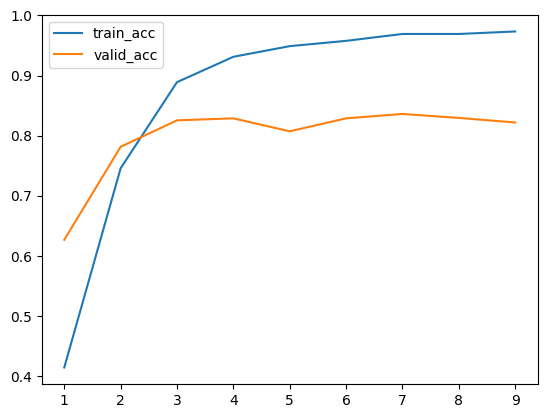

In [29]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

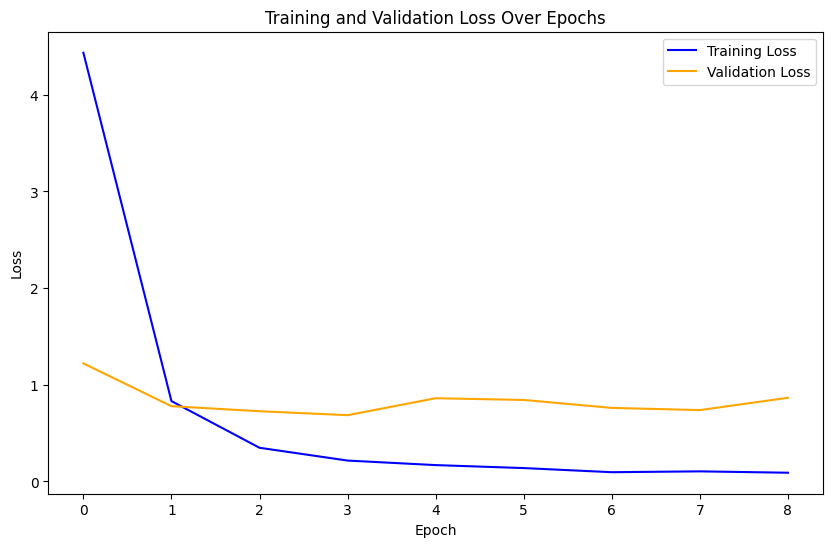

In [30]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open(r'D:\MedicalPlant\finetune2.json') as f:
    data = json.load(f)

# Extract loss and validation loss
loss = data['loss']
val_loss = data['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Add titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [31]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [32]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred

133/133 ━━━━━━━━━━━━━━━━━━━━ 75s 560ms/step


array([[4.2749289e-02, 8.7739993e-03, 4.1464467e-05, ..., 7.6810080e-03,
        6.3761771e-03, 3.8229639e-03],
       [7.2974622e-01, 1.3934198e-02, 4.0365358e-06, ..., 2.7397666e-03,
        1.2667374e-03, 2.6158772e-03],
       [7.5094271e-03, 5.0153217e-04, 9.4841918e-05, ..., 2.0732145e-05,
        6.0590412e-03, 3.1404392e-04],
       ...,
       [2.1141631e-09, 3.8799600e-10, 3.3714904e-13, ..., 3.1582109e-12,
        2.0175500e-08, 9.9997973e-01],
       [8.9364426e-07, 2.7838171e-08, 3.8993284e-11, ..., 9.7363081e-12,
        1.9142002e-08, 9.9967241e-01],
       [3.6670486e-11, 2.7876728e-16, 7.6796772e-16, ..., 2.0170123e-17,
        2.4094039e-11, 1.0000000e+00]], dtype=float32)

In [34]:
y_pred.shape

(4228, 30)

In [35]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 5,  0,  4, ..., 29, 29, 29], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(4228, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.79      0.91      0.85       188
                 Basale       0.78      0.95      0.86       188
                  Betel       0.93      0.98      0.95       168
          Crape_Jasmine       0.85      0.81      0.83       188
                  Curry       0.89      0.86      0.87       188
              Drumstick       0.90      0.97      0.93       188
              Fenugreek       0.98      0.95      0.96       188
                  Guava       0.85      0.97      0.91       188
               Hibiscus       0.70      0.90      0.79       130
           Indian_Beech       0.95      0.61      0.74       128
         Indian_Mustard       0.95      0.96      0.96       128
              Jackfruit       0.84      0.91      0.87       128
Jamaica_Cherry-Gasagase       0.94      0.73      0.82       128
                  Jamun       0.76      0.79      0.77        90
                Jasmine 

In [40]:
cm = confusion_matrix(y_true , predicted_categories)
cm.shape

(30, 30)

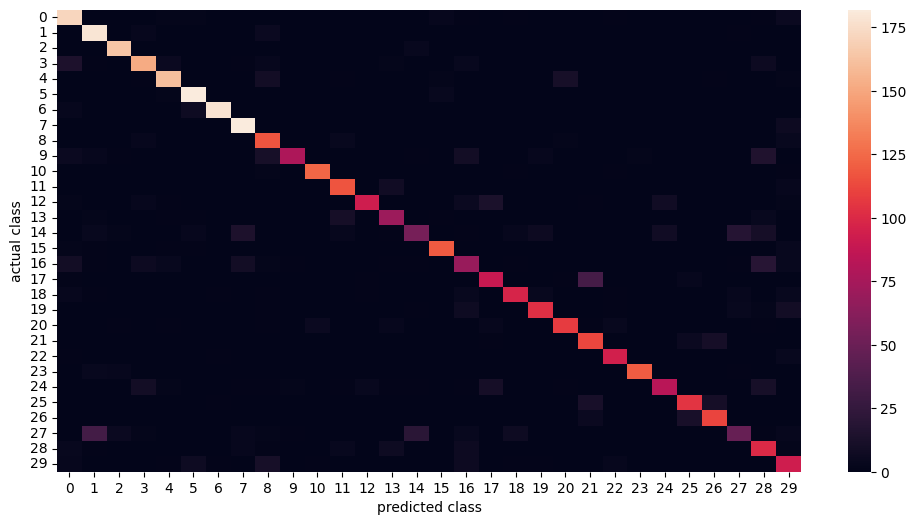

In [41]:
plt.figure(figsize = (12,6))
sns.heatmap(cm)
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()